In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
#Load Titanic Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [14]:
#description
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#further description

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#getting number of rows and coulumn
train.shape

(891, 12)

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
#train['Age'] = train['Age']
#train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode())
#filling the misssing column in Age
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode())

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [197]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [198]:
train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [199]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [200]:
train['Died'] = 1 - train['Survived']

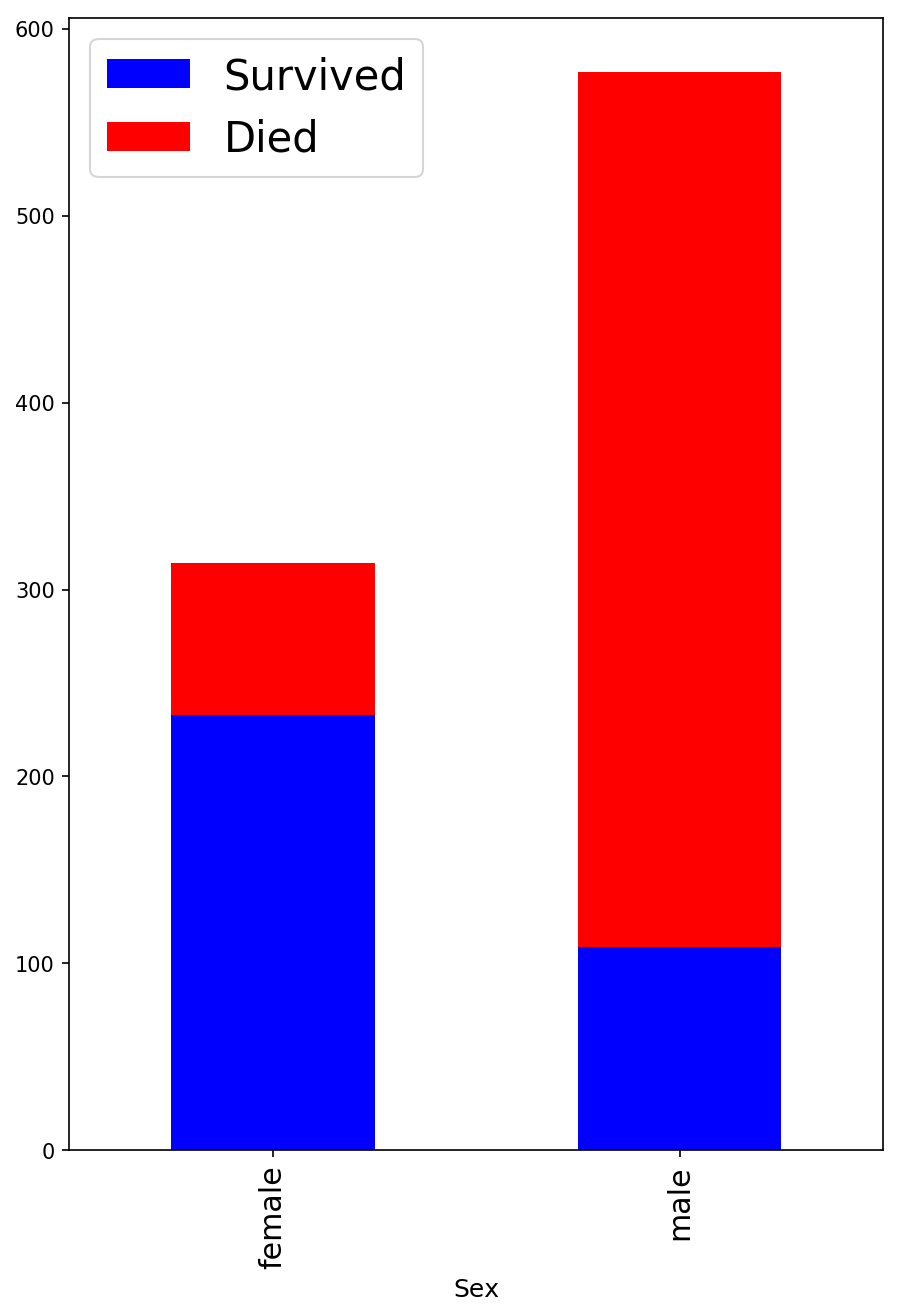

In [201]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(7, 10), stacked=True, color=['b', 'r'])
#visualizing number of survived and died based on Sex of passenger

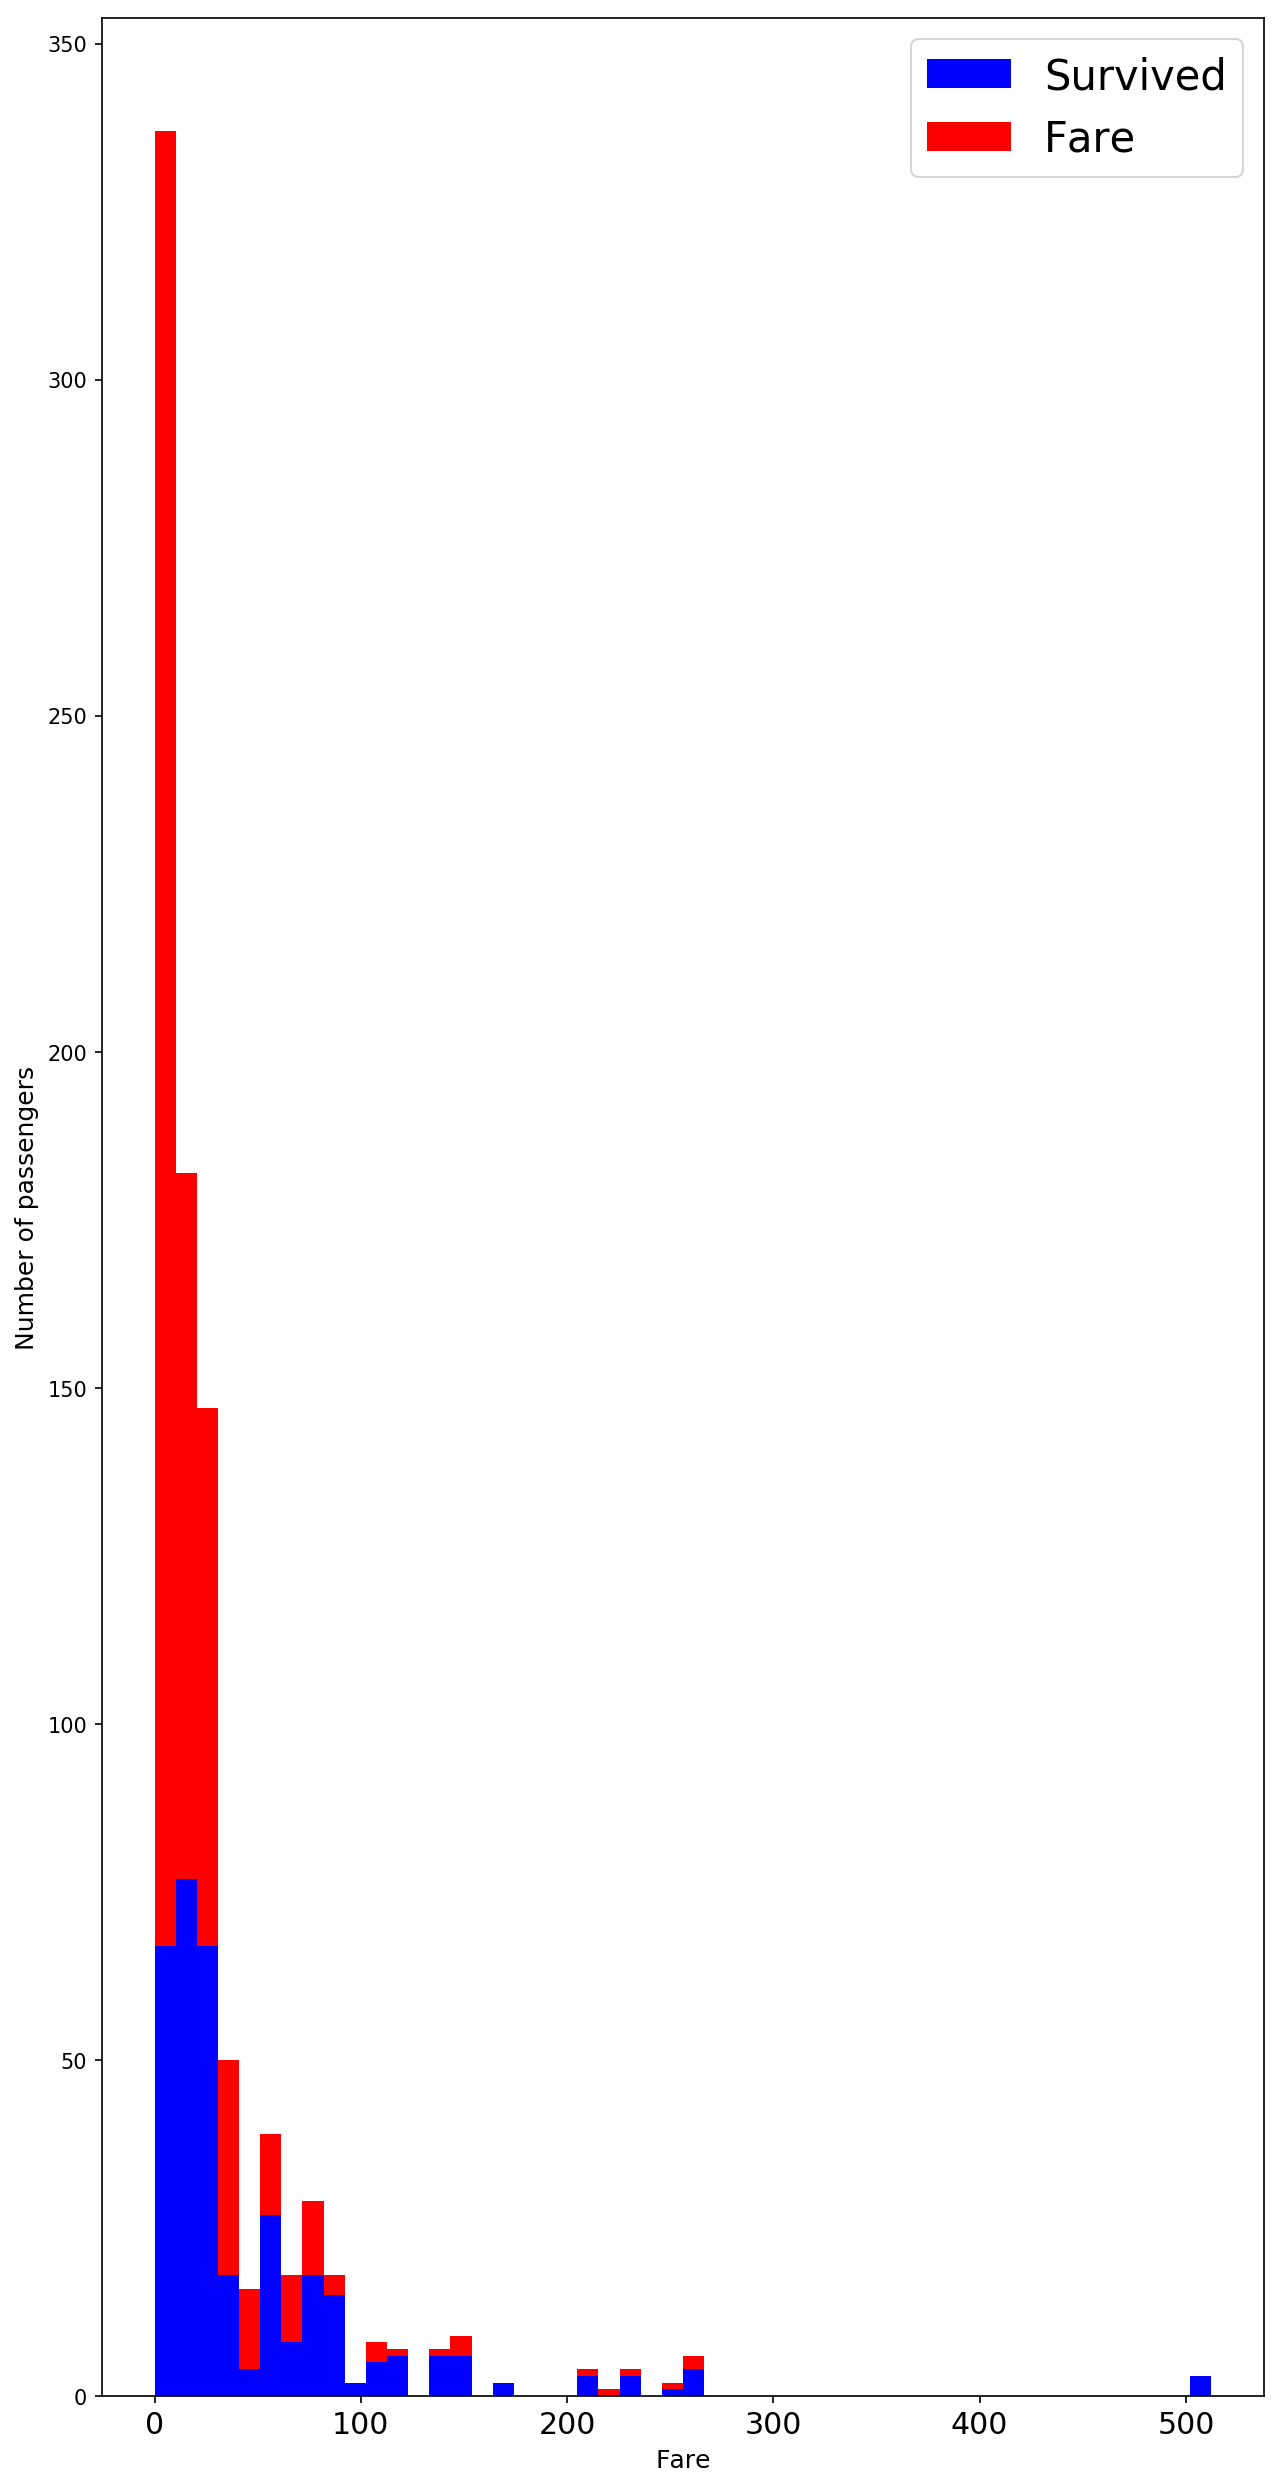

In [202]:
figure = plt.figure(figsize=(10, 21))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], stacked=True, color = ['b','r'], bins = 50, label = ['Survived','Fare'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

here passenger with cheapest fare are most likly to die.

In [203]:
# Convert the male and female groups to integer form
#train["Sex"][train["Sex"] == "male"] = 0

#train['Sex'][train['Sex'] == 'female' ] = 1
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])


In [204]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0


In [205]:
# Impute the Embarked variable
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode)

In [206]:
# Convert the Embarked classes to integer form
train['Embarked'][train['Embarked'] == 'S'] = 0
train['Embarked'][train['Embarked'] == 'C'] = 1
train['Embarked'][train['Embarked'] == 'Q'] = 2
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
#onehotencoder = OneHotEncoder()
#train['Embarked'] = onehotencoder.fit_transform(train['Embarked'])


In [207]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Died
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.616162
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [208]:
# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values


In [209]:

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)


In [210]:
my_tree_one.feature_importances_

array([0.12253744, 0.31117584, 0.25867116, 0.30761556])

from above it show passenger fare plays moost import role in determing whether a passenger survived or not

In [211]:

my_tree_one.score(features_one, target)

0.9797979797979798

In [212]:
# Impute the missing Fare variable
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [213]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values


In [214]:
# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)


In [5]:
# Create a data frame with two columns: PassengerId & Survived
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])


NameError: name 'my_prediction' is not defined

In [222]:
my_solution.to_csv('submision.csv', index=False)

In [223]:
sub = pd.read_csv("submision.csv")
sub.head()

,Survived
0,0
1,0
2,1
3,1
4,1


In [6]:
print(PassengerId)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 